In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import missingno as msno

In [2]:
# Utility function to normalize dataset
def normalize_dataset(data, cols):
    for col in cols:
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    return data

# Function to detect outliers using Local Outlier Factor (LOF)
def detect_outliers_lof(data_table, cols, d_function='euclidean', k=5):
    new_data_table = normalize_dataset(data_table.dropna(axis=0, subset=cols), cols)
    lof = LocalOutlierFactor(n_neighbors=k, metric=d_function)
    outlier_counts = {}
    for col in cols:
        df_col = new_data_table[col].values.reshape(-1, 1)
        outlier_flags = lof.fit_predict(df_col)
        outlier_counts[col] = np.sum(outlier_flags == -1)
        data_table[col] = np.where(outlier_flags == -1, np.nan, data_table[col])
    return data_table, outlier_counts

# Function to load data
def load_data(file_path):
    return pd.read_csv(file_path)

# Function to save data
def save_data(file_path, data):
    data.to_csv(file_path, index=False)

# Apply LOF and visualize results
def apply_lof_and_visualize(base_path, file_name, sensor_columns, sensor_type):
    file_path = os.path.join(base_path, file_name)
    data = load_data(file_path)
    data, outlier_counts = detect_outliers_lof(data, sensor_columns[sensor_type])
    
    # Plot the data
    for col in sensor_columns[sensor_type]:
        plt.figure(figsize=(14, 6))
        plt.plot(data['time'], data[col], label=f'{col} - LOF Filtered', linestyle='None', marker='o', markersize=2)
        plt.title(f'{sensor_type} - LOF Filtered {col}')
        plt.xlabel('Time (s)')
        plt.ylabel(col)
        plt.legend()
        plt.show()
    
    # Save the filtered data with _LOF extension
    new_file_name = file_name.replace('.csv', '_LOF.csv')
    output_path = os.path.join(base_path, new_file_name)
    save_data(output_path, data)
    
    return outlier_counts


In [3]:
# Define paths and sensor columns
base_path = '/Users/priyank/Desktop/ML4QS-project/All DATA/Raw Combined Data'
sensor_files = {
    'accelerometer': 'Combined_Accelerometer_0.5s.csv',
    'gyroscope': 'Combined_Gyroscope_0.5s.csv',
    'linear_accelerometer': 'Combined_Linear Accelerometer_0.5s.csv',
    'magnetometer': 'Combined_Magnetometer_0.5s.csv'
}

sensor_columns = {
    'accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'gyroscope': ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'],
    'linear_accelerometer': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'magnetometer': ['X (µT)', 'Y (µT)', 'Z (µT)']
}

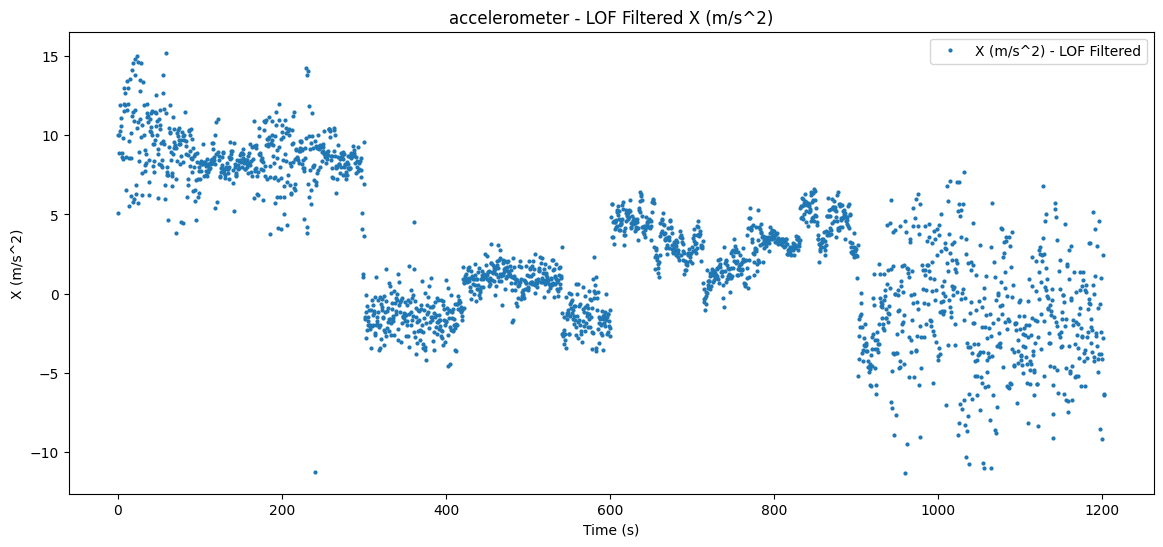

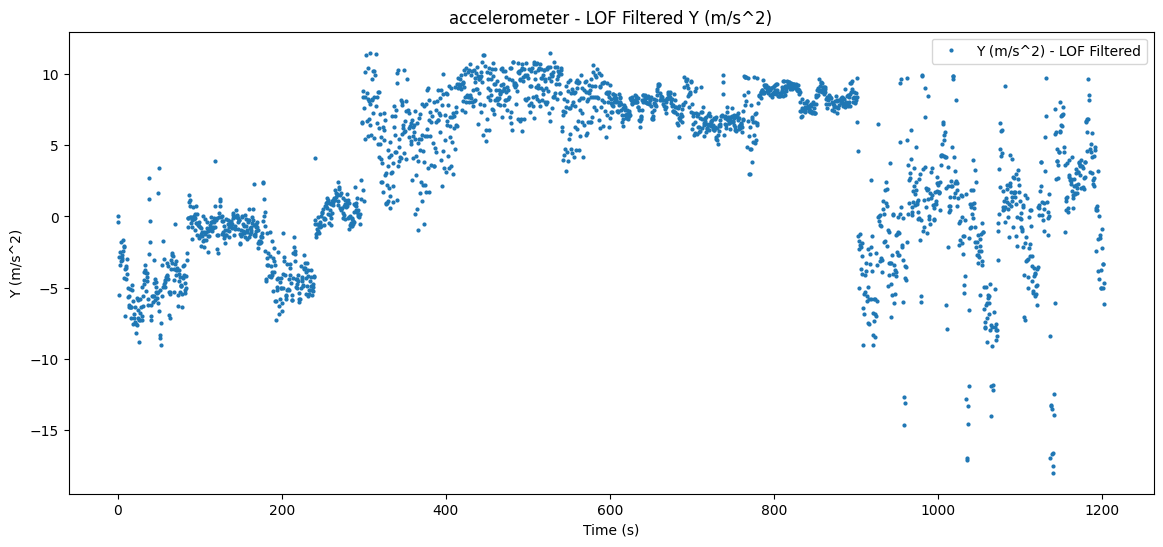

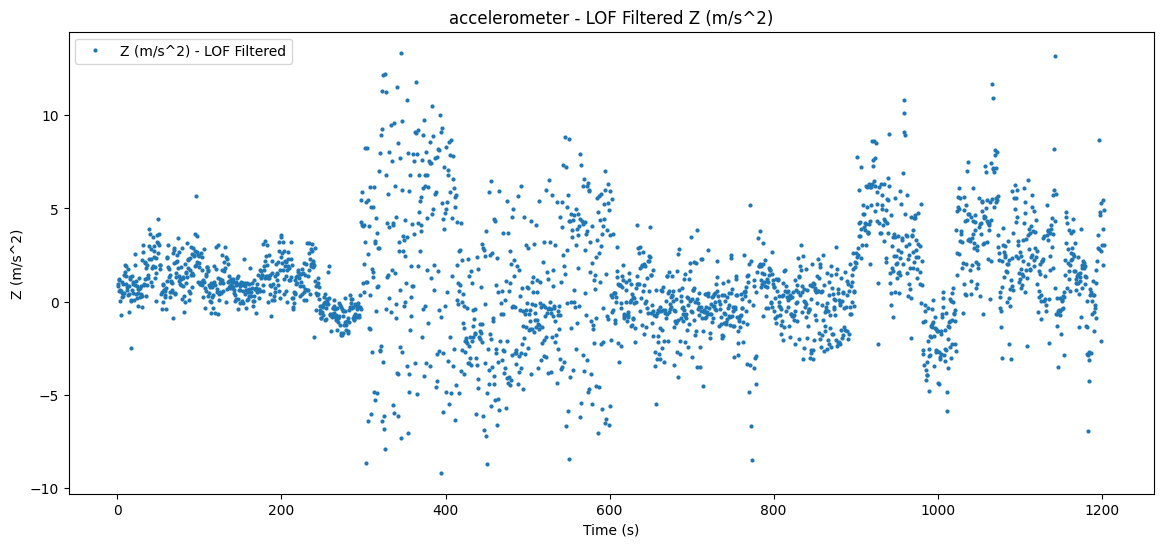

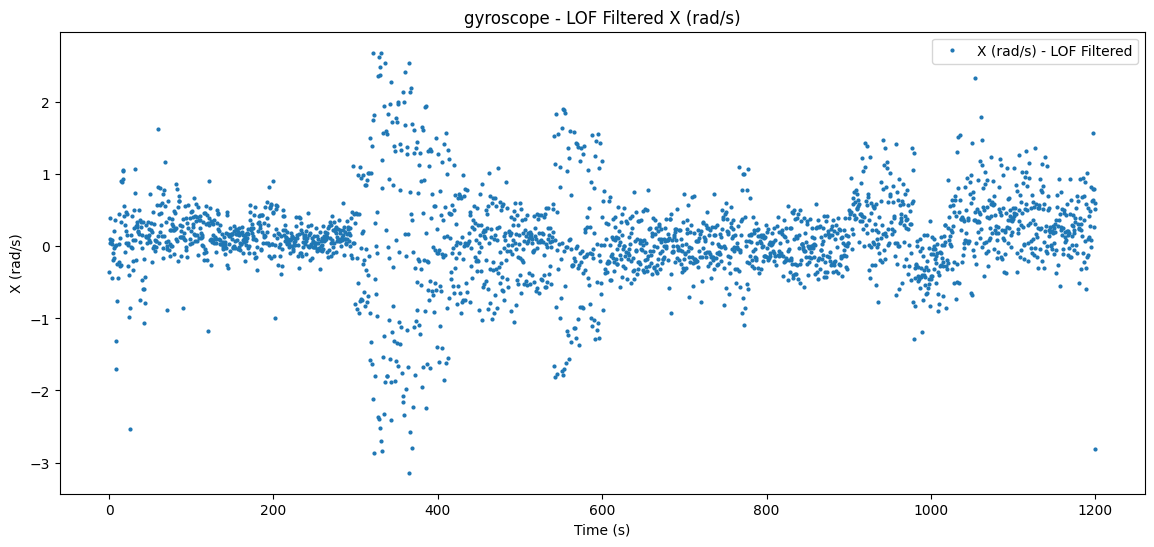

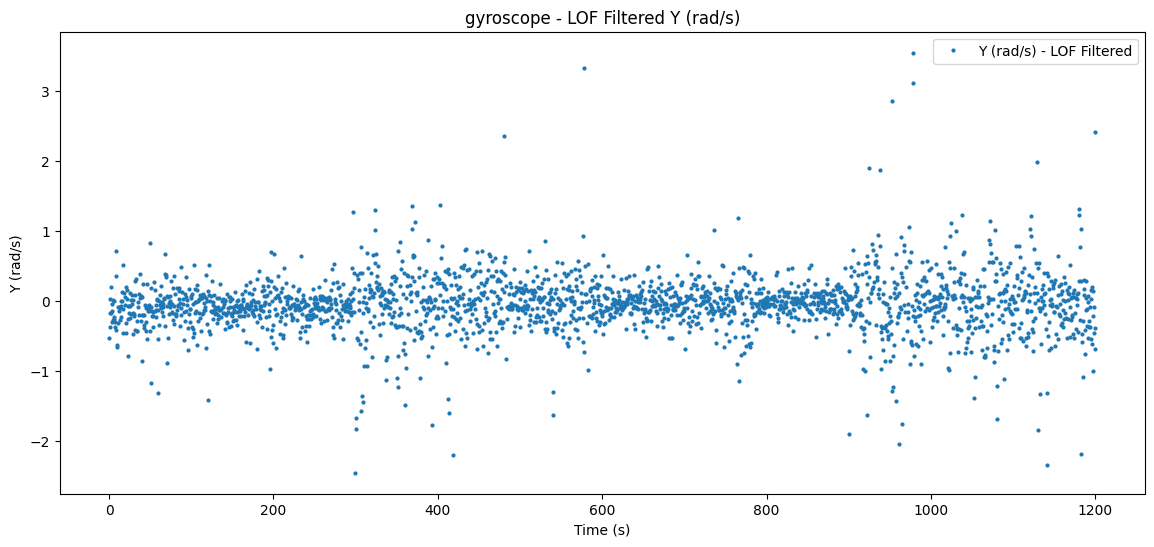

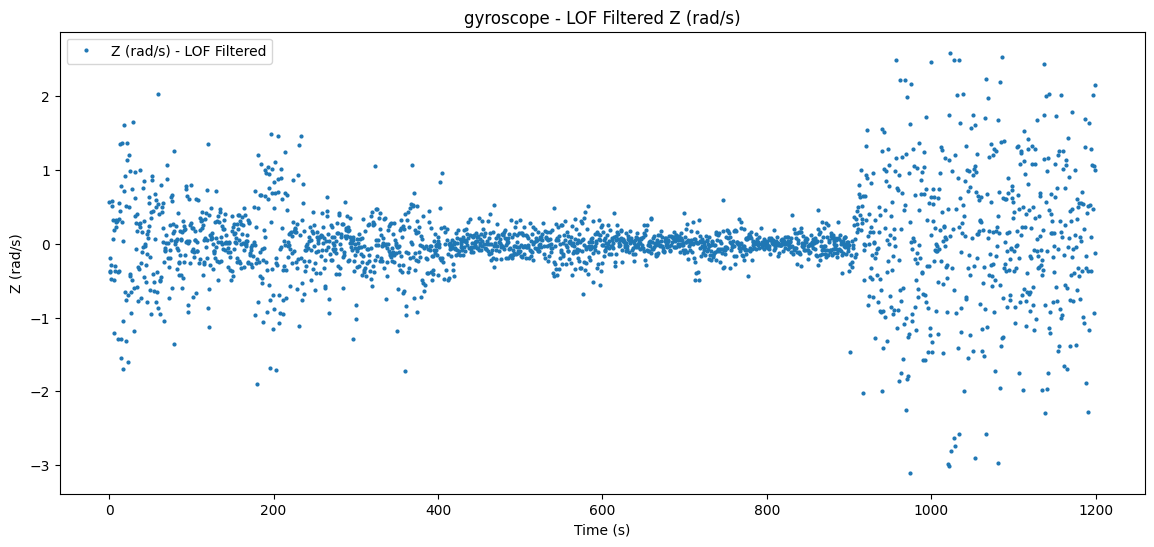

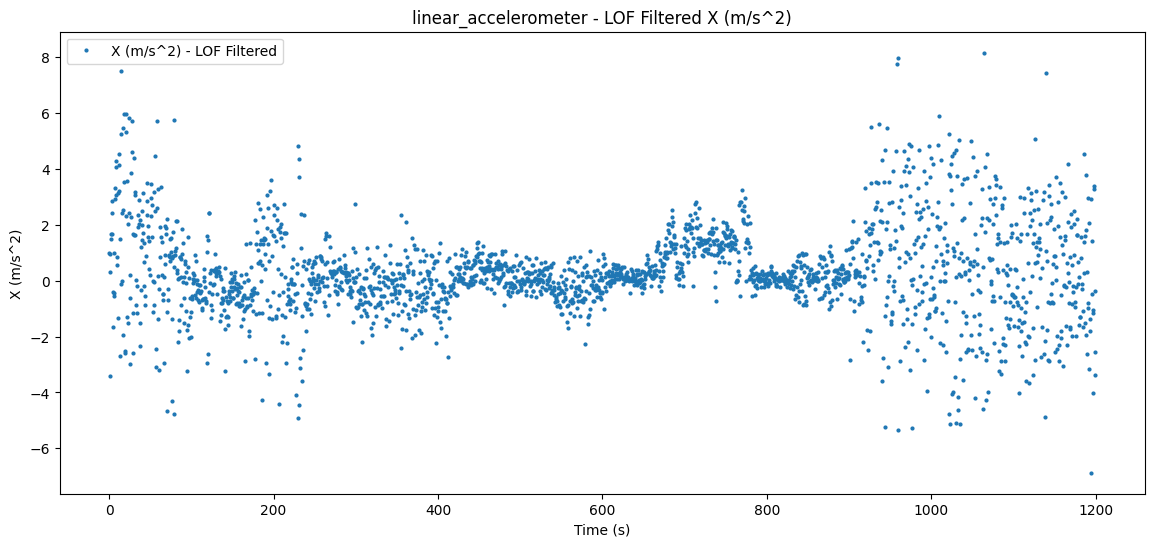

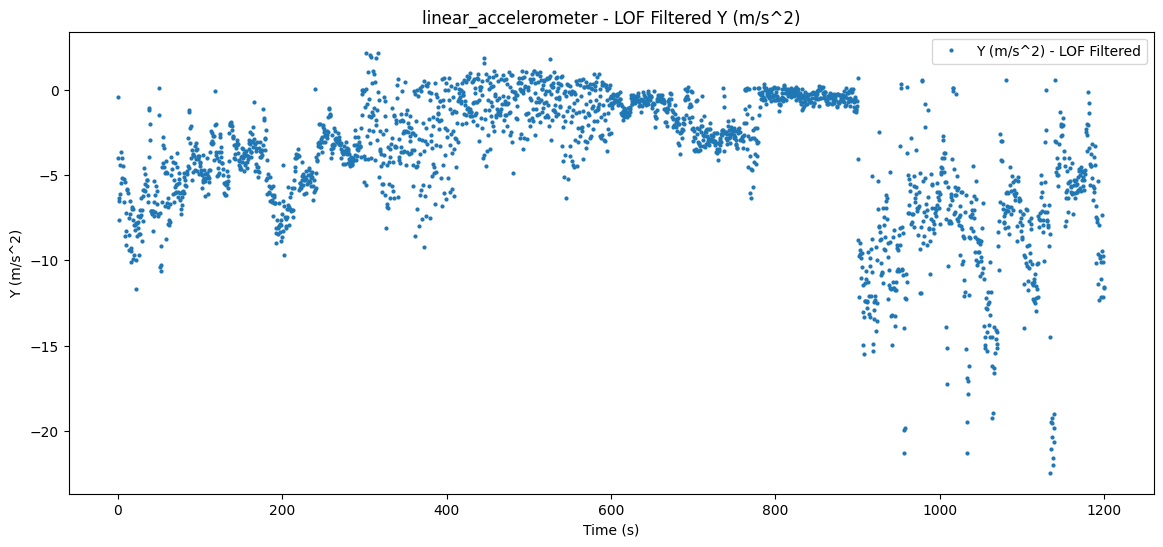

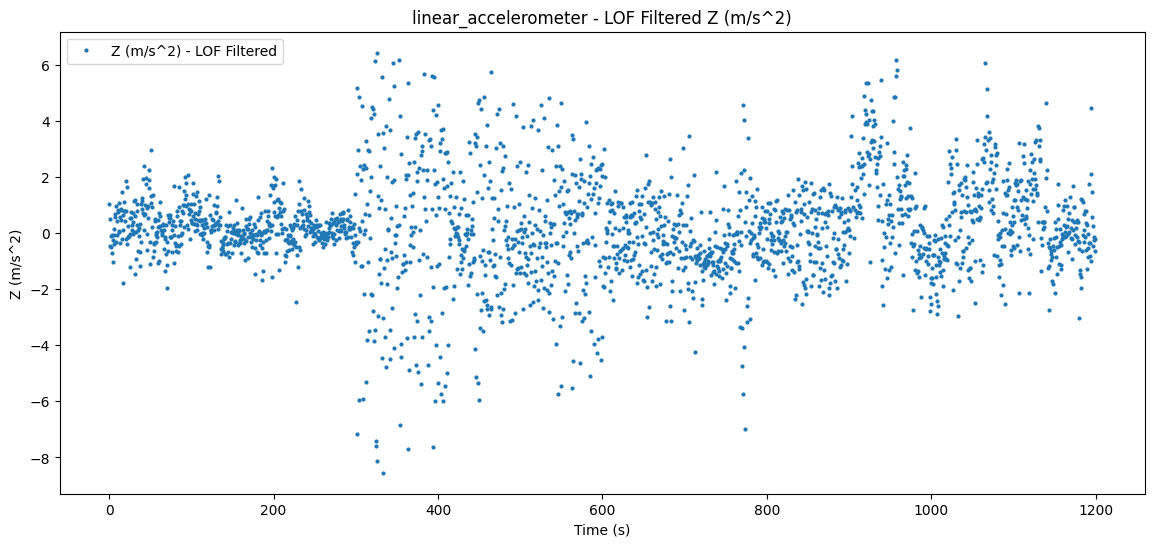

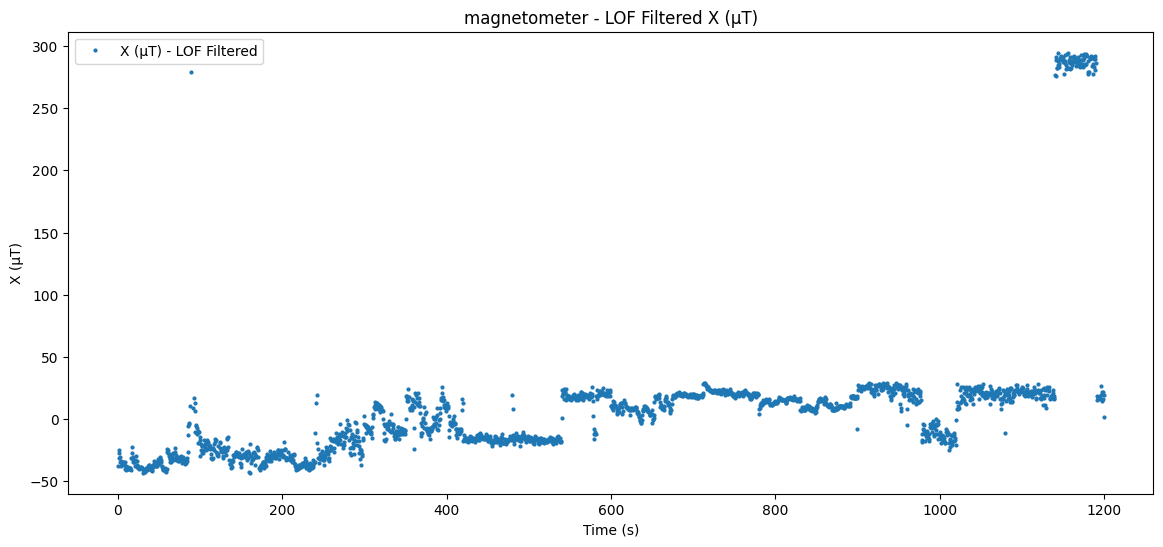

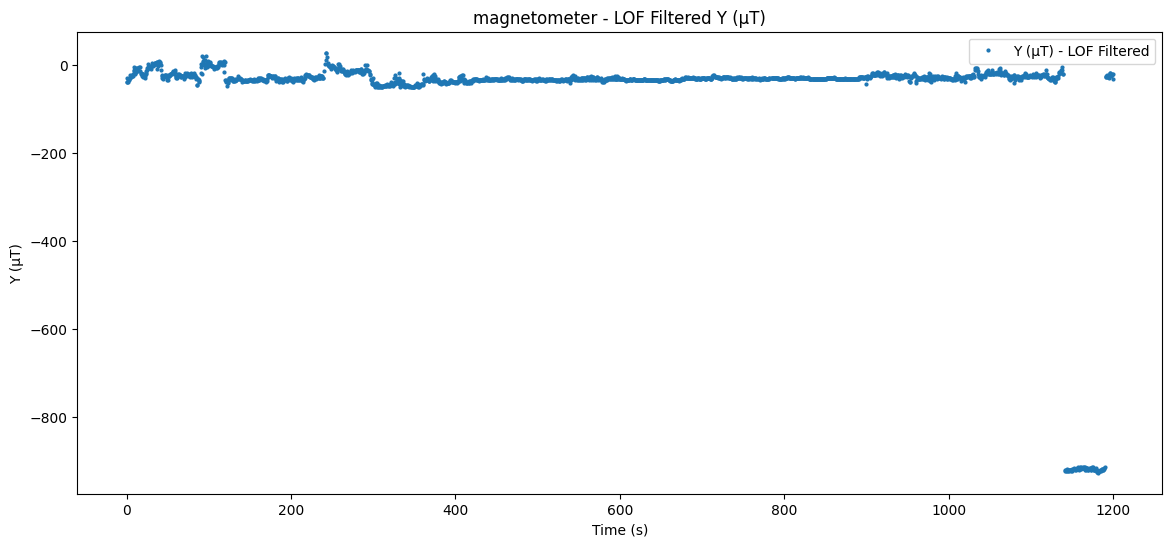

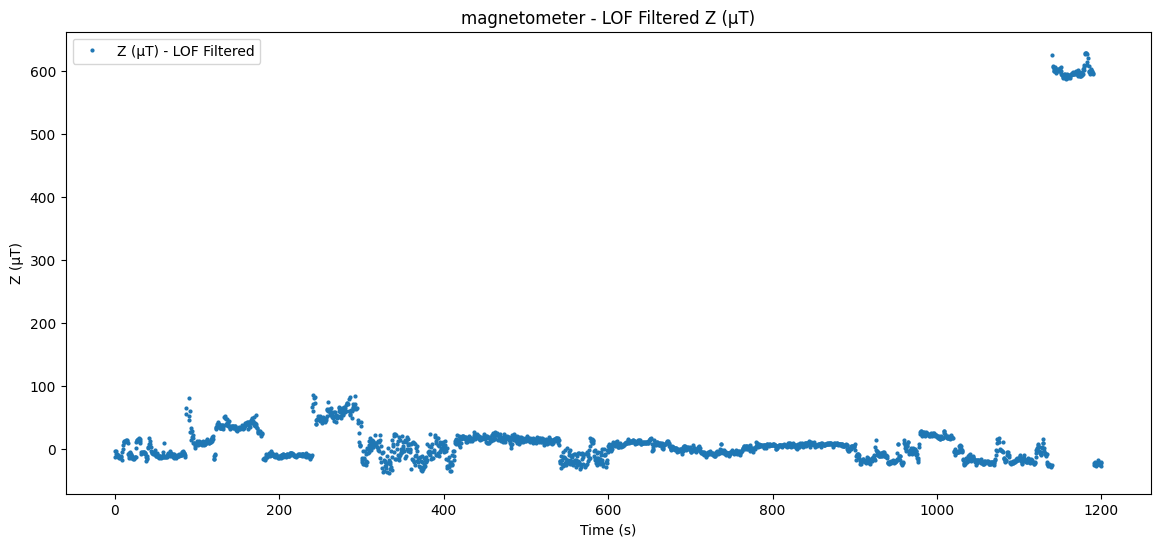

Summary of LOF Outliers:
accelerometer outliers: {'X (m/s^2)': 102, 'Y (m/s^2)': 152, 'Z (m/s^2)': 110}
gyroscope outliers: {'X (rad/s)': 77, 'Y (rad/s)': 103, 'Z (rad/s)': 157}
linear_accelerometer outliers: {'X (m/s^2)': 128, 'Y (m/s^2)': 93, 'Z (m/s^2)': 106}
magnetometer outliers: {'X (µT)': 146, 'Y (µT)': 127, 'Z (µT)': 125}


In [4]:
# Apply LOF and visualize for each sensor type
outlier_summary = {}

for sensor_type, file_name in sensor_files.items():
    outlier_counts = apply_lof_and_visualize(base_path, file_name, sensor_columns, sensor_type)
    outlier_summary[sensor_type] = outlier_counts

# Print the summary of outliers
print("Summary of LOF Outliers:")
for sensor_type, counts in outlier_summary.items():
    print(f"{sensor_type} outliers: {counts}")

# Missing Data visualisation

In [5]:
# Define the base path
base_path = '/Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data'

# Define the sensor files
sensor_files = {
    'accelerometer': 'Combined_Accelerometer_0.5s_LOF.csv',
    'gyroscope': 'Combined_Gyroscope_0.5s_LOF.csv',
    'linear_accelerometer': 'Combined_Linear Accelerometer_0.5s_LOF.csv',
    'magnetometer': 'Combined_Magnetometer_0.5s_LOF.csv'
}


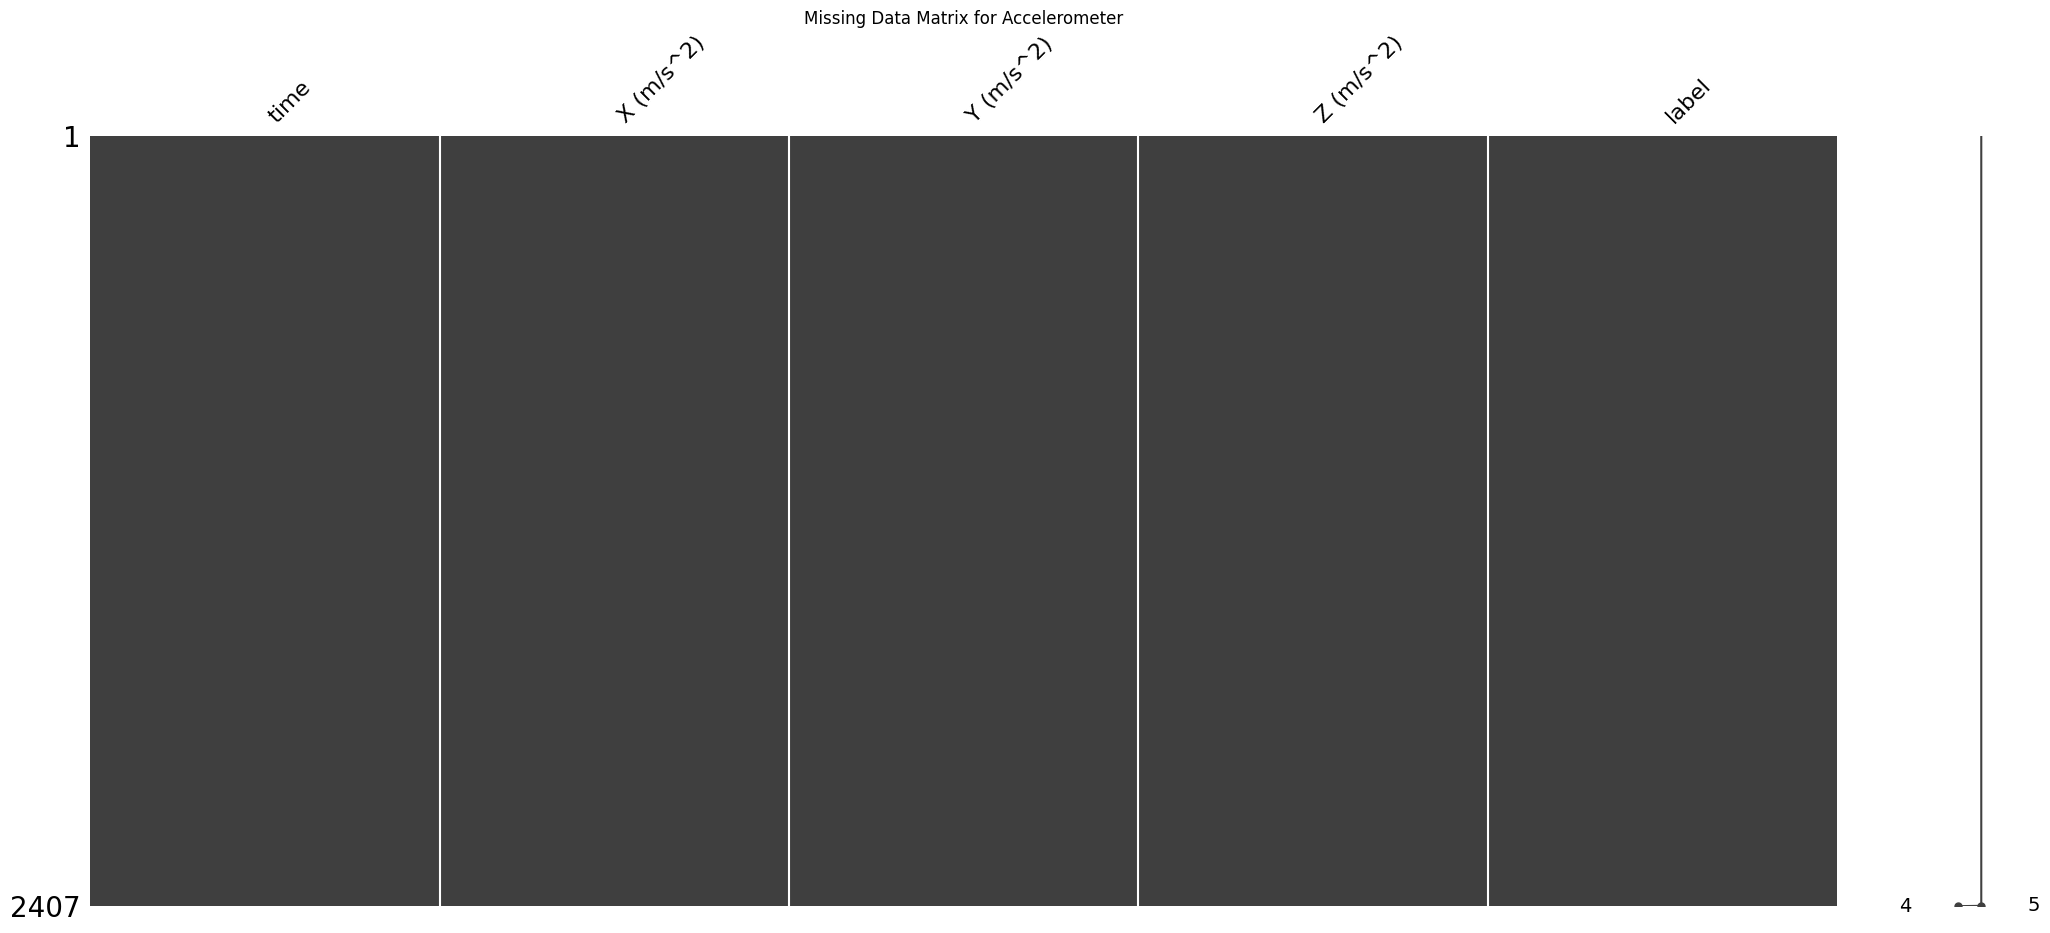

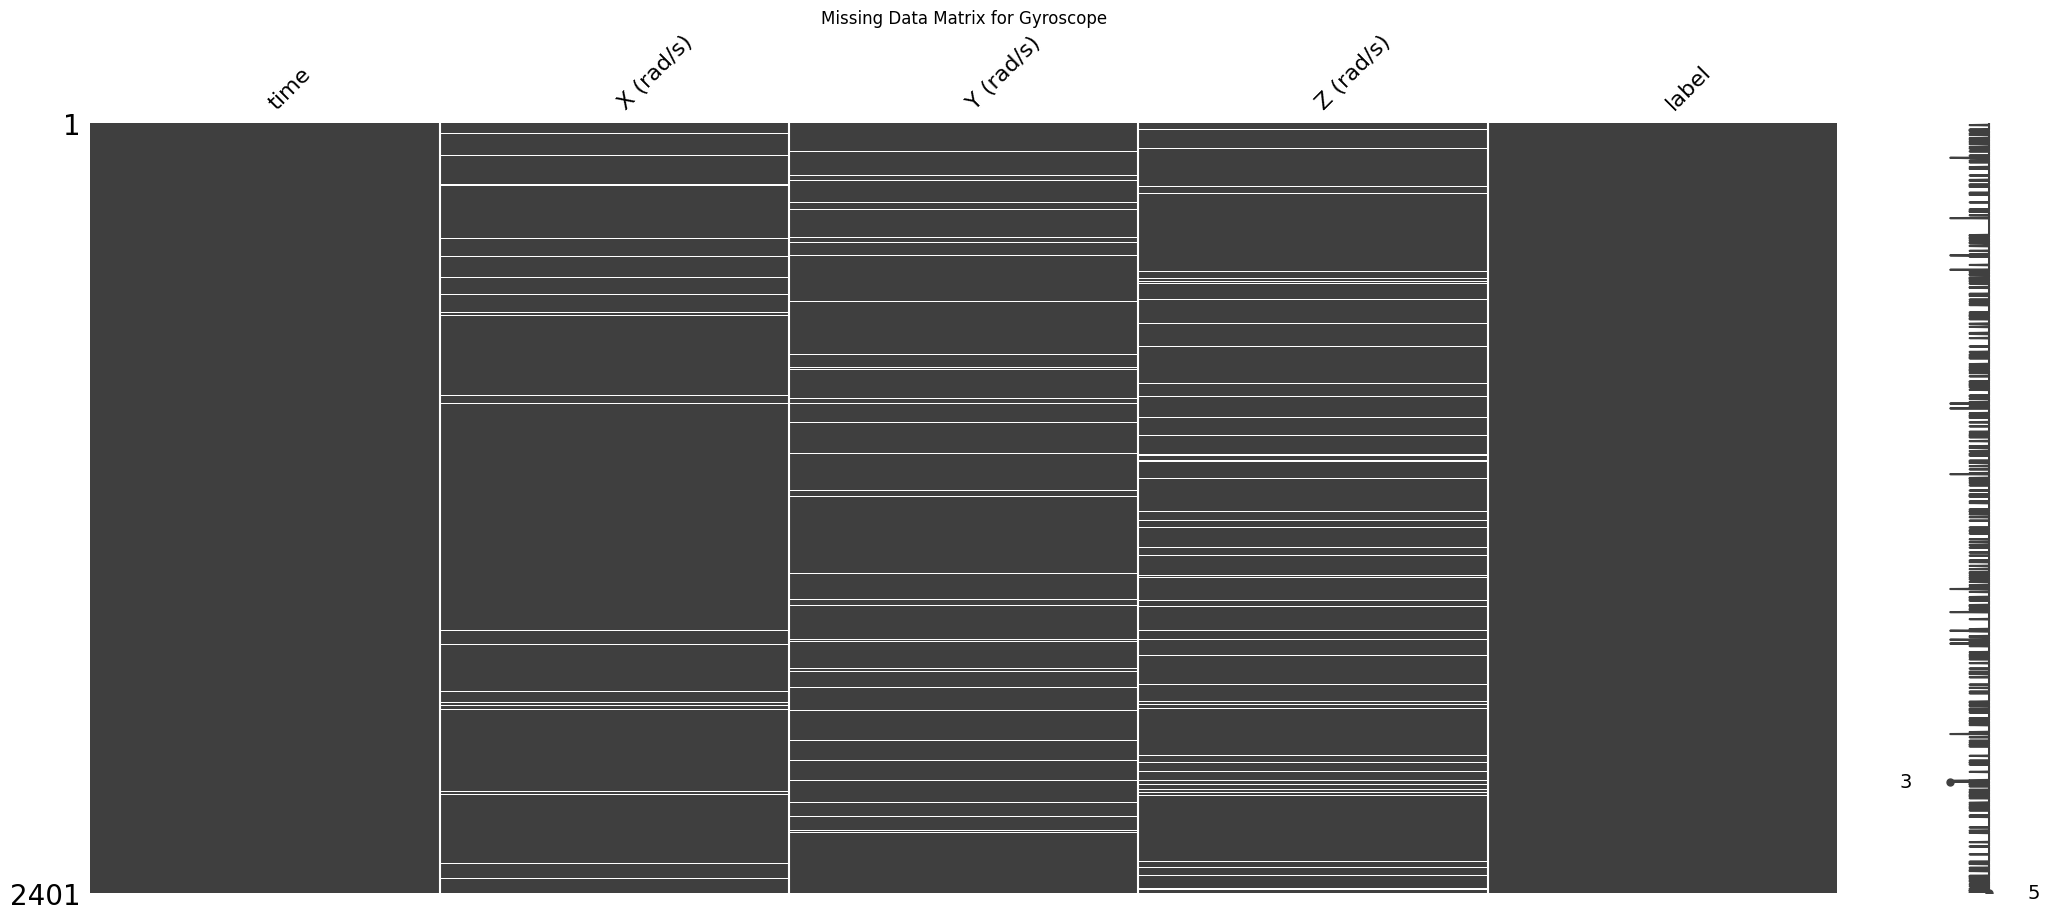

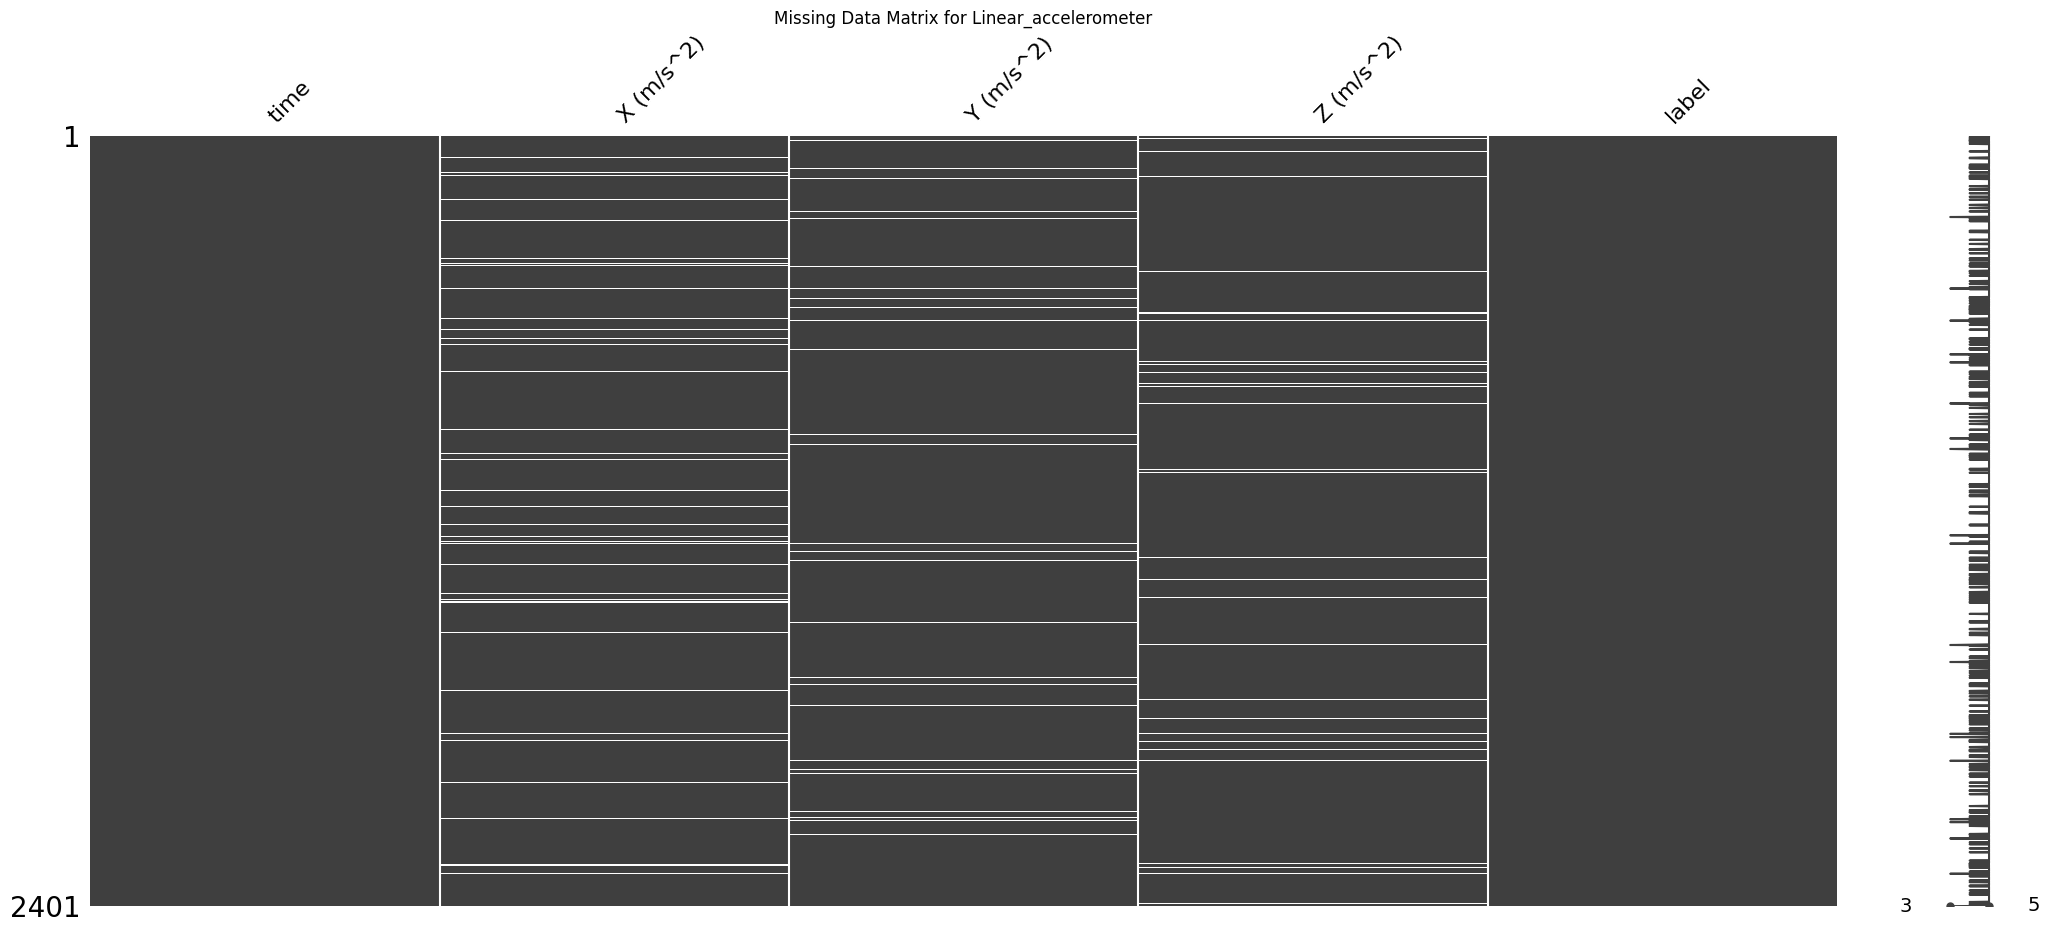

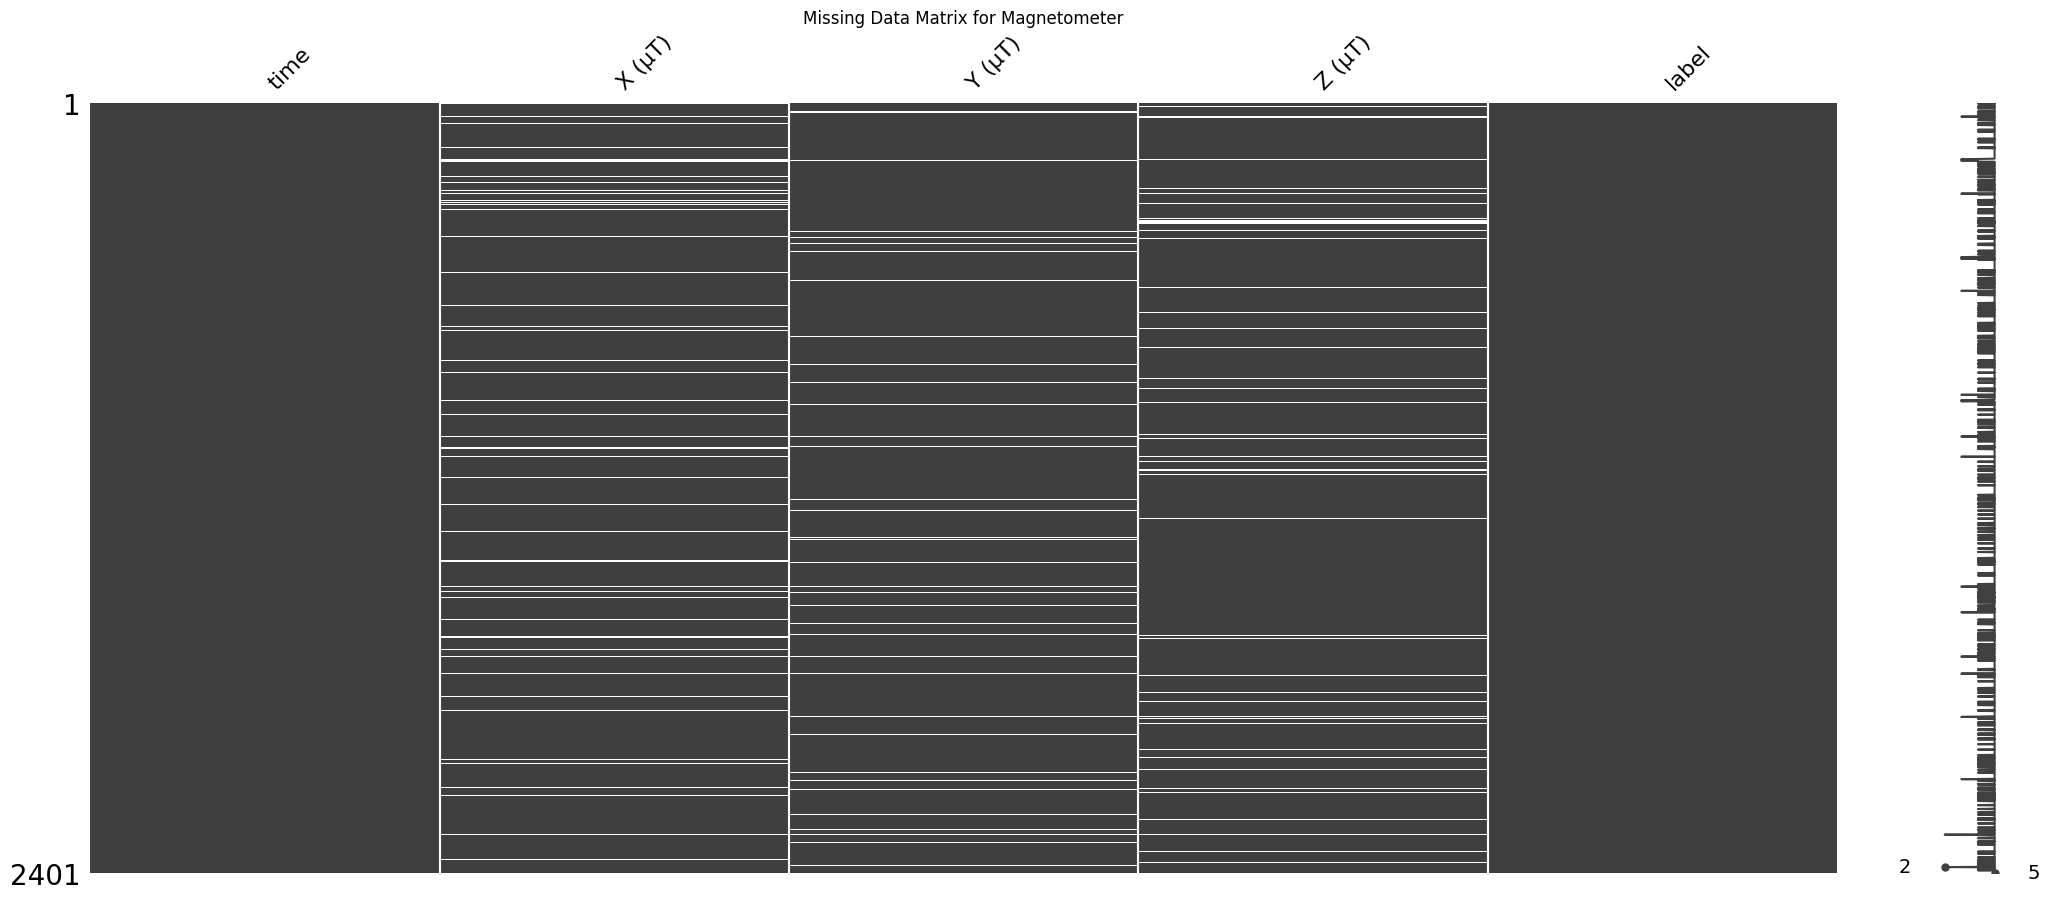

In [6]:
# Load data and visualize missing values
for sensor_type, filename in sensor_files.items():
    file_path = os.path.join(base_path, filename)
    data = pd.read_csv(file_path)

    # Visualize missing values using missingno
    msno.matrix(data)
    plt.title(f'Missing Data Matrix for {sensor_type.capitalize()}')
    plt.show()

# Spline Based Interpolation

In [7]:
base_path = '/Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/'


In [8]:
files = [
    'Combined_Accelerometer_0.5s_LOF.csv',
    'Combined_Gyroscope_0.5s_LOF.csv',
    'Combined_Linear Accelerometer_0.5s_LOF.csv',
    'Combined_Magnetometer_0.5s_LOF.csv'
]

In [9]:
# Function to apply spline interpolation
def apply_spline_interpolation(base_path, files):
    for file in files:
        df = pd.read_csv(base_path + file)
        df.interpolate(method='spline', order=3, inplace=True)
        df.to_csv(base_path + file.replace('_LOF', '_interpolated_spline'), index=False)

    print("Spline interpolation applied and files saved.")

# Apply spline interpolation
apply_spline_interpolation(base_path, files)

/var/folders/2x/qvm0crws7bg90q5cwky7y2p40000gn/T/ipykernel_46239/4215182549.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='spline', order=3, inplace=True)
/var/folders/2x/qvm0crws7bg90q5cwky7y2p40000gn/T/ipykernel_46239/4215182549.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='spline', order=3, inplace=True)
/var/folders/2x/qvm0crws7bg90q5cwky7y2p40000gn/T/ipykernel_46239/4215182549.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='spline', order=3, inplace=True)
/var/folders/2x/qvm0crws7bg90q5cwky7y2p40000gn/T/ipykernel_46239/42151825

Spline interpolation applied and files saved.


In [10]:
# Define the paths to the files
files = [
    'Combined_Accelerometer_0.5s_interpolated_spline.csv',
    'Combined_Gyroscope_0.5s_interpolated_spline.csv',
    'Combined_Linear Accelerometer_0.5s_interpolated_spline.csv',
    'Combined_Magnetometer_0.5s_interpolated_spline.csv'
]

base_path = '/Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/'

# Function to check and handle missing data at the start of the dataset
def handle_missing_start_data(file_path):
    df = pd.read_csv(file_path)
    if df.isna().iloc[0].any():
        print(f"Missing data at the start detected in {file_path}. Applying backward fill.")
        df.fillna(method='bfill', inplace=True)
        df.to_csv(file_path, index=False)
    else:
        print(f"No missing data at the start in {file_path}.")

# Apply the function to each file
for file in files:
    handle_missing_start_data(os.path.join(base_path, file))

print("Missing data handling completed.")

No missing data at the start in /Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/Combined_Accelerometer_0.5s_interpolated_spline.csv.
No missing data at the start in /Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/Combined_Gyroscope_0.5s_interpolated_spline.csv.
No missing data at the start in /Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/Combined_Linear Accelerometer_0.5s_interpolated_spline.csv.
No missing data at the start in /Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/Combined_Magnetometer_0.5s_interpolated_spline.csv.
Missing data handling completed.


# Compare Raw data with Splined data

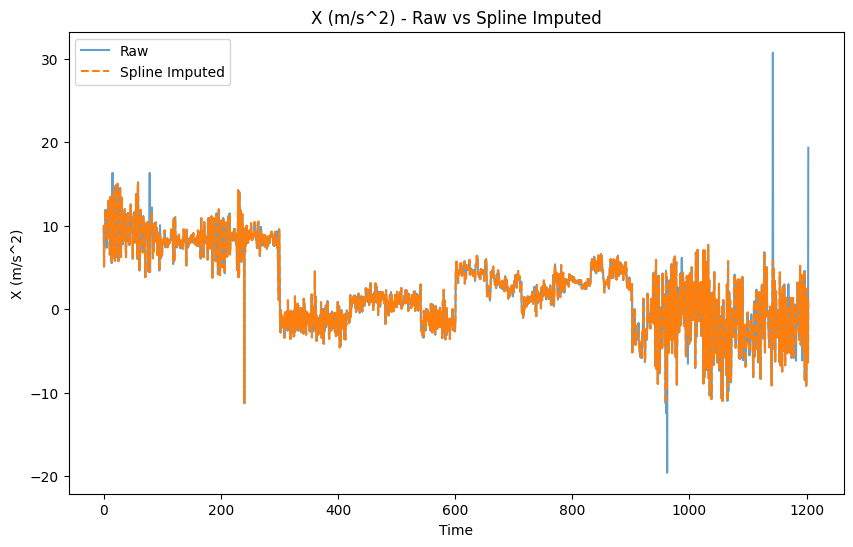

Statistics for X (m/s^2) in Combined_Accelerometer_0.5s.csv:
MSE: 0.9371
MAE: 0.0972
Correlation: 0.9786



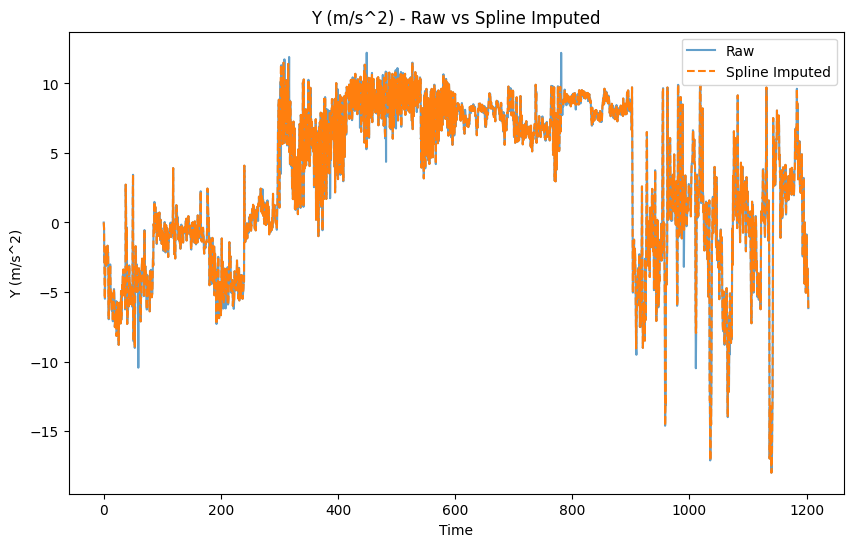

Statistics for Y (m/s^2) in Combined_Accelerometer_0.5s.csv:
MSE: 0.2754
MAE: 0.0865
Correlation: 0.9955



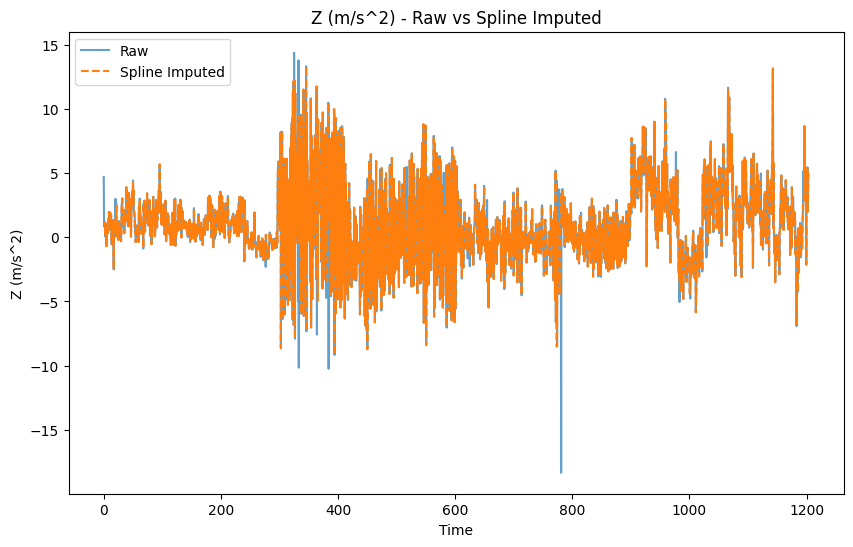

Statistics for Z (m/s^2) in Combined_Accelerometer_0.5s.csv:
MSE: 1.4393
MAE: 0.1480
Correlation: 0.9193



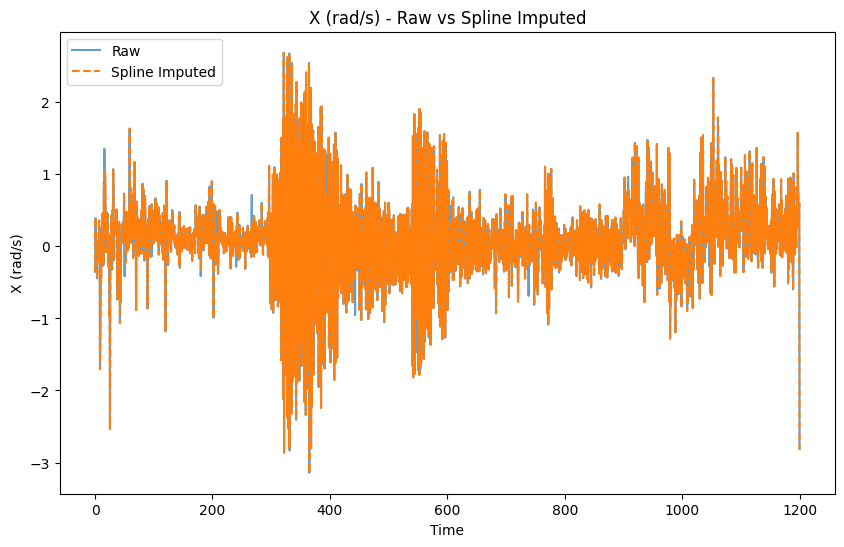

Statistics for X (rad/s) in Combined_Gyroscope_0.5s.csv:
MSE: 0.0091
MAE: 0.0120
Correlation: 0.9880



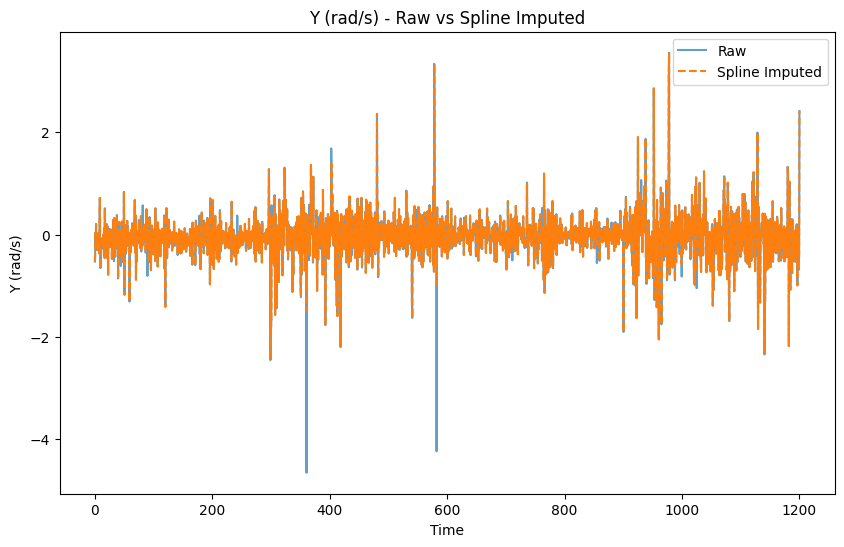

Statistics for Y (rad/s) in Combined_Gyroscope_0.5s.csv:
MSE: 0.0242
MAE: 0.0162
Correlation: 0.9324



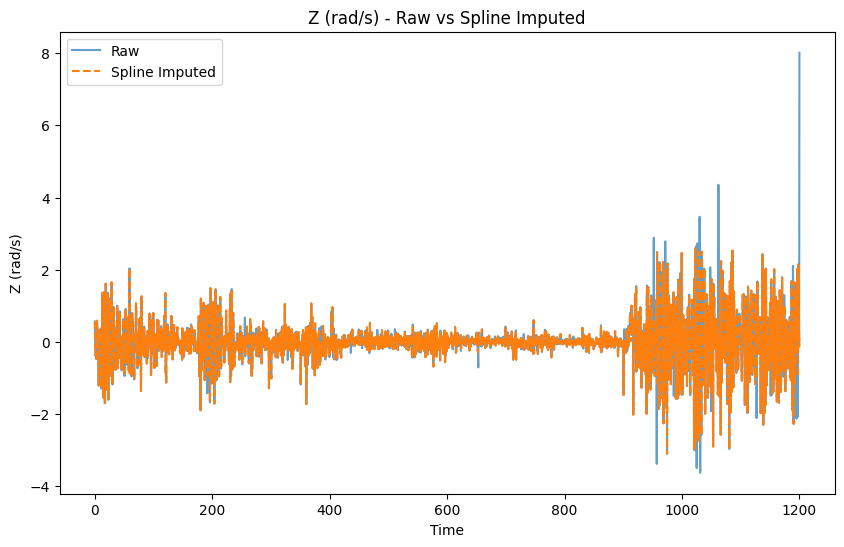

Statistics for Z (rad/s) in Combined_Gyroscope_0.5s.csv:
MSE: 0.0908
MAE: 0.0378
Correlation: 0.8854



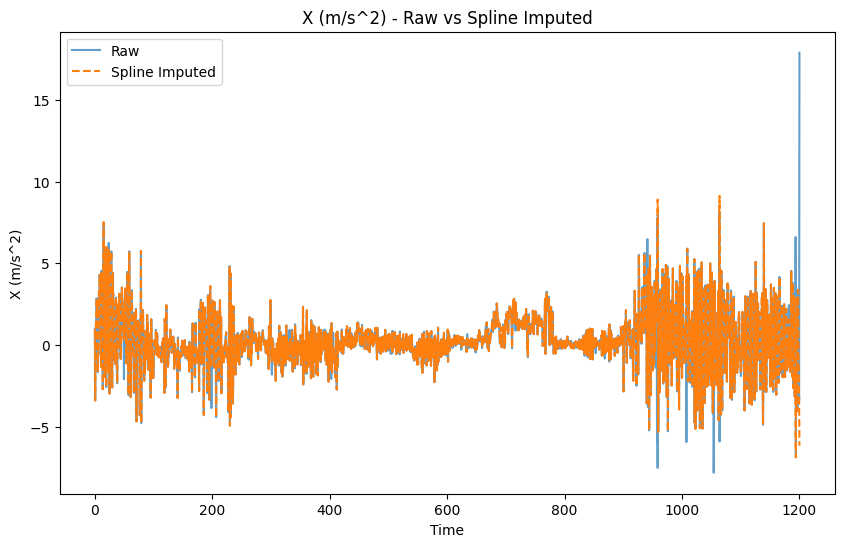

Statistics for X (m/s^2) in Combined_Linear Accelerometer_0.5s.csv:
MSE: 0.7777
MAE: 0.0894
Correlation: 0.8492



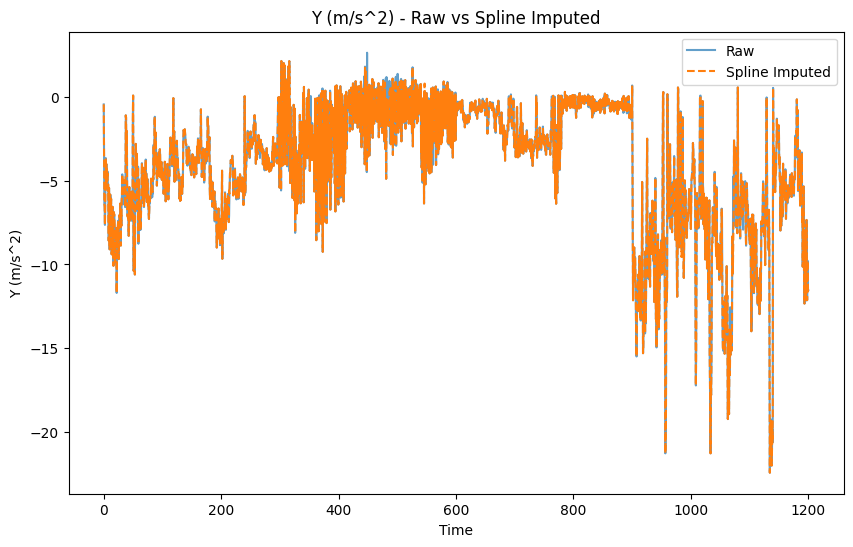

Statistics for Y (m/s^2) in Combined_Linear Accelerometer_0.5s.csv:
MSE: 0.1282
MAE: 0.0445
Correlation: 0.9956



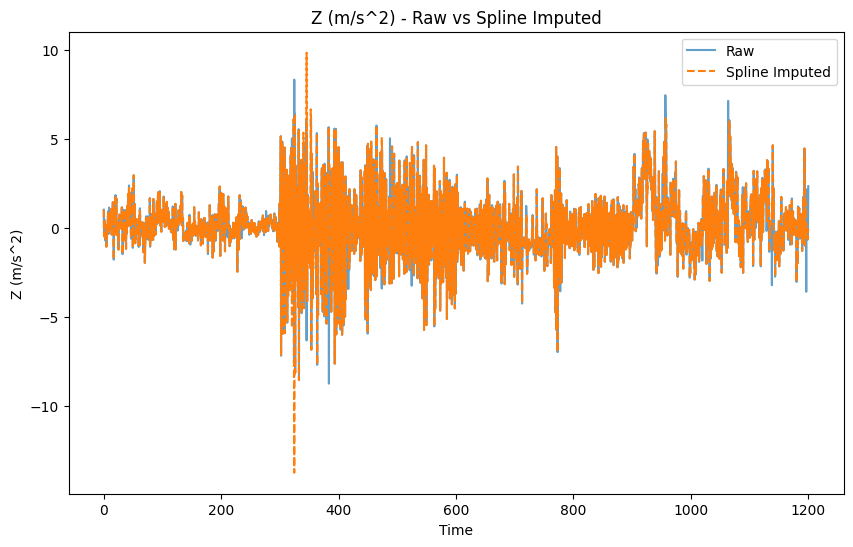

Statistics for Z (m/s^2) in Combined_Linear Accelerometer_0.5s.csv:
MSE: 0.7120
MAE: 0.0935
Correlation: 0.8886



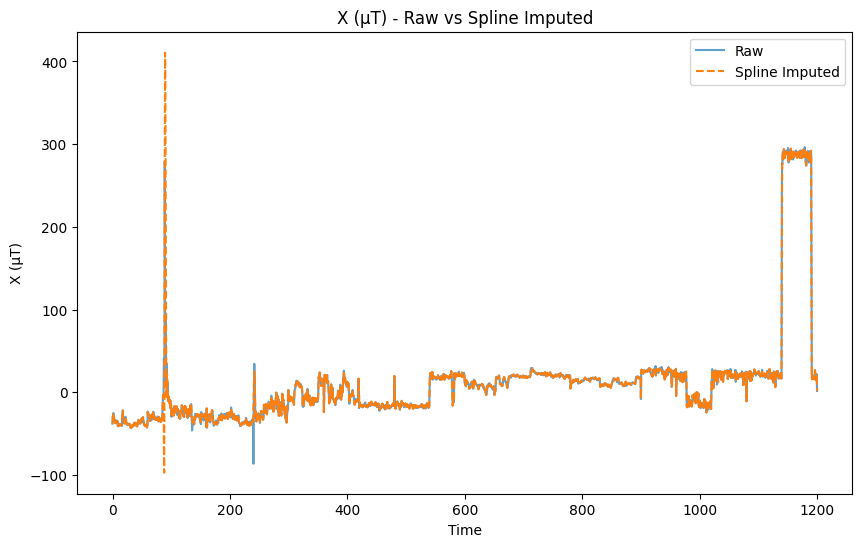

Statistics for X (µT) in Combined_Magnetometer_0.5s.csv:
MSE: 109.7679
MAE: 0.7049
Correlation: 0.9860



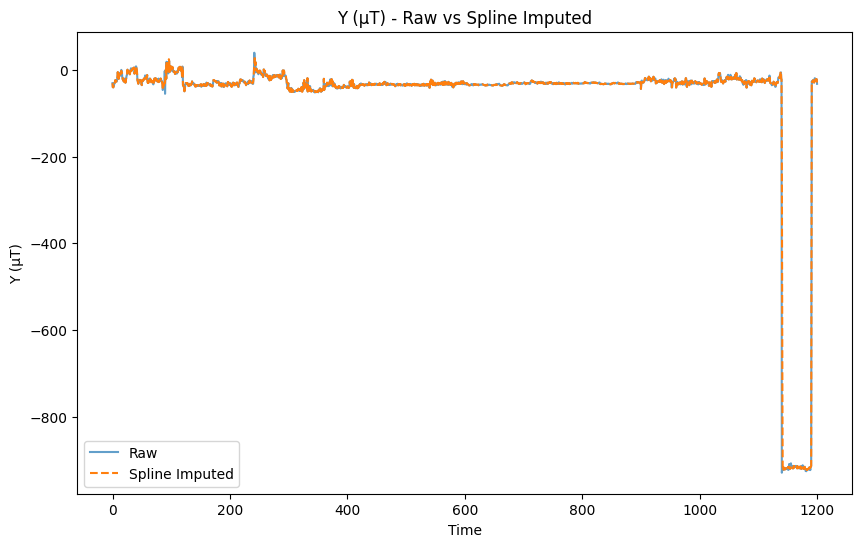

Statistics for Y (µT) in Combined_Magnetometer_0.5s.csv:
MSE: 328.8209
MAE: 0.7563
Correlation: 0.9949



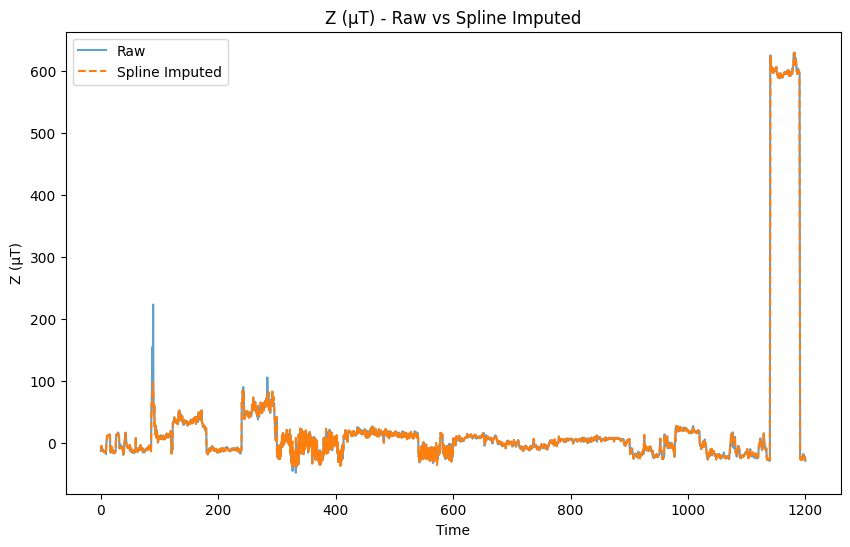

Statistics for Z (µT) in Combined_Magnetometer_0.5s.csv:
MSE: 56.7013
MAE: 0.5702
Correlation: 0.9981



In [11]:
# Define paths
raw_base_path = '/Users/priyank/Desktop/ML4QS-project/All DATA/Raw Combined Data/'
imputed_base_path = '/Users/priyank/Desktop/ML4QS-project/All DATA/LOF Processed Data/'

raw_files = [
    'Combined_Accelerometer_0.5s.csv',
    'Combined_Gyroscope_0.5s.csv',
    'Combined_Linear Accelerometer_0.5s.csv',
    'Combined_Magnetometer_0.5s.csv'
]

imputed_files = [
    'Combined_Accelerometer_0.5s_interpolated_spline.csv',
    'Combined_Gyroscope_0.5s_interpolated_spline.csv',
    'Combined_Linear Accelerometer_0.5s_interpolated_spline.csv',
    'Combined_Magnetometer_0.5s_interpolated_spline.csv'
]

sensor_columns = {
    'Combined_Accelerometer_0.5s.csv': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'Combined_Gyroscope_0.5s.csv': ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'],
    'Combined_Linear Accelerometer_0.5s.csv': ['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)'],
    'Combined_Magnetometer_0.5s.csv': ['X (µT)', 'Y (µT)', 'Z (µT)']
}

# Function to plot raw vs imputed data
def plot_comparison(raw_data, imputed_data, col):
    plt.figure(figsize=(10, 6))
    plt.plot(raw_data['time'], raw_data[col], label='Raw', alpha=0.7)
    plt.plot(imputed_data['time'], imputed_data[col], label='Spline Imputed', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.title(f'{col} - Raw vs Spline Imputed')
    plt.legend()
    plt.show()

# Function to compare statistical measures
def compare_statistics(raw_data, imputed_data, col):
    mse = mean_squared_error(raw_data[col], imputed_data[col])
    mae = mean_absolute_error(raw_data[col], imputed_data[col])
    correlation = raw_data[col].corr(imputed_data[col])
    return mse, mae, correlation

# Loop over each file to compare
for raw_file, imputed_file in zip(raw_files, imputed_files):
    raw_data = pd.read_csv(raw_base_path + raw_file)
    imputed_data = pd.read_csv(imputed_base_path + imputed_file)
    columns = sensor_columns[raw_file]
    
    for col in columns:
        # Plot comparison
        plot_comparison(raw_data, imputed_data, col)
        
        # Calculate and print statistical measures
        mse, mae, correlation = compare_statistics(raw_data, imputed_data, col)
        print(f'Statistics for {col} in {raw_file}:')
        print(f'MSE: {mse:.4f}')
        print(f'MAE: {mae:.4f}')
        print(f'Correlation: {correlation:.4f}\n')